# Analysis and Visualization of the NEET Population (15-24 years)

**Author:** Nina and Ligia

**Data Source:** `dados_brutos.csv`

**Objective:** This notebook analyzes microdata from the PNAD Contínua for Q4 2024, calculates the total NEET population and breaks it down by gender, and generates a chart to visualize the results.

ano — interview year 2024
Source: IBGE

trimestre — 4
Source: IBGE

id_uf — numeric code of the Federative Unit (state) (11=RO … 53=DF). For abbreviation/name, join with br_bd_diretorios_brasil.uf.
Source: Base dos Dados

V1022 – Dwelling location (urban/rural): 1=Urban, 2=Rural.
Source: IBGE (FTP docs)

V2007 – Sex: 1=Male, 2=Female.
Source: IBGE

V2009 – Age: completed years.
Source: IBGE

V2010 – Race/Color: 1=White, 2=Black, 3=Asian (Yellow), 4=Brown (Pardo), 5=Indigenous, 9=Ignored/Not declared.
Source: IBGE

V3002 – Attends school/course? 1=Yes, 2=No (basis for the “E” in NEET).
Source: IBGE

VD4002 – Labor force status in the reference week (derived): 1=Employed, 2=Unemployed, 3=Out of the labor force (basis for the “T” in NEET: not employed).
Source: IBGE (FTP docs)

V4032 – Contributes to a social security institute for this job? 1=Yes, 2=No (asked of employed; “not applicable” if not employed).
Source: IBGE (FTP docs)

VD4019 – Usual earnings from all jobs (derived): monthly nominal income (currency values).
Source: IBGE (FTP docs)

V1028 – Sample weight: historical “household/person weight” with corrections and post-stratification.
Note: for person-level analyses, the more common weight is V1032 (final weight) (and its replicate weights for variance).
Source: IBGE

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Um único arquivo de entrada
FILE = "dados_brutos.csv"   # mude para o arquivo que você realmente quer usar

# 2) Lê o arquivo e cria DataFrame 'data'
data = pd.read_csv(FILE, encoding="utf-8", low_memory=False)

# 3) Se quiser salvar depois de limpar, só faz isso no final:
# data.to_csv(FILE, index=False)   # sobrescreve o mesmo arquivo

# 4) Checagem rápida
display(data.head(10))
print(f"Linhas: {len(data):,}")
print("Colunas:", list(data.columns))


,ano,trimestre,id_uf,area_code,sex_code,age,race_code,school_code,education_code,labor_force_code,occupation_code,discouraged_code,children_under14_code,weight
0,2024,1,12,2,2,27,4,2.0,5.0,2.0,NaN,NaN,NaN,42.102464
1,2024,1,12,2,1,0,4,NaN,NaN,NaN,NaN,NaN,NaN,47.496029
2,2024,1,12,2,2,28,4,2.0,7.0,1.0,2.0,NaN,NaN,47.496029
3,2024,1,12,2,1,24,4,2.0,5.0,1.0,1.0,NaN,NaN,57.921004
4,2024,1,12,2,2,0,4,NaN,NaN,NaN,NaN,NaN,NaN,51.784148
5,2024,1,12,2,2,22,4,2.0,4.0,2.0,NaN,NaN,NaN,45.658331
6,2024,1,12,1,1,49,4,2.0,5.0,1.0,1.0,NaN,NaN,48.911538
7,2024,1,12,1,1,55,1,2.0,2.0,1.0,1.0,NaN,NaN,51.697696
8,2024,1,12,1,2,51,2,2.0,1.0,1.0,1.0,NaN,NaN,52.318020
9,2024,1,12,1,2,43,4,2.0,1.0,1.0,1.0,NaN,NaN,41.985813


Linhas: 3,811,436
Colunas: ['ano', 'trimestre', 'id_uf', 'area_code', 'sex_code', 'age', 'race_code', 'school_code', 'education_code', 'labor_force_code', 'occupation_code', 'discouraged_code', 'children_under14_code', 'weight']


Statistics


In [25]:
missing = data.isnull().sum()
missing_pct = (missing / len(data)) * 100
missing_table = pd.DataFrame({
    "Missing": missing,
    "Missing %": missing_pct.round(2)
}).sort_values("Missing", ascending=False)
display(missing_table)

,Missing,Missing %
discouraged_code,3728075,97.81
children_under14_code,3284683,86.18
occupation_code,2029284,53.24
labor_force_code,682910,17.92
education_code,217069,5.70
school_code,217069,5.70
age,0,0.00
sex_code,0,0.00
area_code,0,0.00
id_uf,0,0.00


In [26]:
display(data.describe().T)

for col in data.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False).head(10))


,count,mean,std,min,25%,50%,75%,max
ano,3811436.0,2023.501241,0.499999,2023.000000,2023.000000,2024.00000,2024.00000,2024.000000
trimestre,3811436.0,2.495888,1.116032,1.000000,1.000000,2.00000,3.00000,4.000000
id_uf,3811436.0,30.949518,10.982360,11.000000,23.000000,31.00000,41.00000,53.000000
area_code,3811436.0,1.267603,0.442710,1.000000,1.000000,1.00000,2.00000,2.000000
sex_code,3811436.0,1.516960,0.499712,1.000000,1.000000,2.00000,2.00000,2.000000
age,3811436.0,37.323538,22.218444,0.000000,18.000000,37.00000,54.00000,119.000000
race_code,3811436.0,2.628823,1.433083,1.000000,1.000000,4.00000,4.00000,9.000000
school_code,3594367.0,1.751398,0.432203,1.000000,2.000000,2.00000,2.00000,2.000000
education_code,3594367.0,3.643639,1.929314,1.000000,2.000000,3.00000,5.00000,7.000000
labor_force_code,3128526.0,1.430354,0.495126,1.000000,1.000000,1.00000,2.00000,2.000000


### 2. Organizing Raw Columns  

To make the dataset more intuitive, we will create cleaner versions of some raw columns.  
- **Sex:** Instead of `sex_code` (1=Male, 2=Female), we will create a binary variable called `female`:  
  - `1` if the person is Female  
  - `0` if the person is Male  
This will simplify later analysis, especially when calculating gender-specific statistics.  


In [27]:
# (1 = Female, 0 = Male)
# Se houver valores inesperados, eles ficam como NaN
data["sex_code"] = data["sex_code"].map({1: 0, 2: 1})

# 2) rename 'female'
data.rename(columns={"sex_code": "female"}, inplace=True)

# checking if it works
print(data["female"].value_counts(dropna=False))


female
1    1970360
0    1841076
Name: count, dtype: int64


In [28]:
# Drop children_under14_code column if it exists
data.drop(columns=["children_under14_code"])


,ano,trimestre,id_uf,area_code,female,age,race_code,school_code,education_code,labor_force_code,occupation_code,discouraged_code,weight
0,2024,1,12,2,1,27,4,2.0,5.0,2.0,NaN,NaN,42.102464
1,2024,1,12,2,0,0,4,NaN,NaN,NaN,NaN,NaN,47.496029
2,2024,1,12,2,1,28,4,2.0,7.0,1.0,2.0,NaN,47.496029
3,2024,1,12,2,0,24,4,2.0,5.0,1.0,1.0,NaN,57.921004
4,2024,1,12,2,1,0,4,NaN,NaN,NaN,NaN,NaN,51.784148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811431,2023,1,15,1,0,49,4,2.0,2.0,1.0,1.0,NaN,1330.390534
3811432,2023,1,15,1,1,49,1,2.0,5.0,1.0,1.0,NaN,794.985492
3811433,2023,4,15,1,0,50,4,2.0,2.0,1.0,1.0,NaN,1323.351904
3811434,2023,4,15,1,1,40,4,2.0,5.0,1.0,1.0,NaN,1601.243374


In [29]:
print(data)

          ano  trimestre  id_uf  area_code  female  age  race_code  \
0        2024          1     12          2       1   27          4   
1        2024          1     12          2       0    0          4   
2        2024          1     12          2       1   28          4   
3        2024          1     12          2       0   24          4   
4        2024          1     12          2       1    0          4   
...       ...        ...    ...        ...     ...  ...        ...   
3811431  2023          1     15          1       0   49          4   
3811432  2023          1     15          1       1   49          1   
3811433  2023          4     15          1       0   50          4   
3811434  2023          4     15          1       1   40          4   
3811435  2023          4     15          1       0   28          4   

         school_code  education_code  labor_force_code  occupation_code  \
0                2.0             5.0               2.0              NaN   
1        

### 3. Filter Data for Analysis  

In this step, we narrow down the dataset to focus only on the population relevant to our NEET study:  
1. **Period:** Q4 2024 (year = 2024, quarter = 4).  
2. **Age group:** Youth aged between 14 and 25 years old.  


In [30]:
mask_period = (data["ano"] == 2024) & (data["trimestre"] == 4)
mask_age = (data["age"].between(15, 24, inclusive="both"))

data_scope = data[mask_period & mask_age].copy()

print(f"Filtered dataset shape: {data_scope.shape[0]:,} rows × {data_scope.shape[1]:,} columns")
display(data_scope.head())


Filtered dataset shape: 64,218 rows × 14 columns


,ano,trimestre,id_uf,area_code,female,age,race_code,school_code,education_code,labor_force_code,occupation_code,discouraged_code,children_under14_code,weight
1019,2024,4,12,2,0,22,2,2.0,4.0,1.0,1.0,NaN,NaN,74.279937
1020,2024,4,12,2,1,22,4,2.0,2.0,2.0,NaN,NaN,NaN,82.500457
1022,2024,4,12,2,1,18,4,2.0,4.0,2.0,NaN,NaN,NaN,77.519537
1042,2024,4,12,1,0,24,4,2.0,3.0,1.0,2.0,NaN,NaN,93.745438
1043,2024,4,12,1,0,18,1,2.0,5.0,2.0,NaN,NaN,NaN,69.434665


### 4. Identify NEET Population and Calculate Totals

In this step, we apply the NEET definition to filter individuals who are not studying and not working. Then, we use the sample weights to estimate the actual population and print the results.

The column contains the sample weights, or expansion factors. Since the PNAD survey is based on a statistical sample, not the entire population, each record is assigned a weight that indicates how many people it represents in the total population. By summing these weights for our filtered group (the NEETs), we are extrapolating from the sample to get a statistically valid estimate of the total number of NEETs nationwide. Simply counting the rows would only give us the number of NEETs in the sample itself, not the population estimate we need.

In [31]:
# Supondo que 'data_scope' já é um DataFrame do pandas filtrado por idade e período

print("Identifying the NEET population and calculating totals...")

# Identificar indivíduos NEET: não estuda (código 2) E não está ocupado (código não é 1)
df_neet = data_scope[
    (data_scope['school_code'] == 2) &
    (data_scope['occupation_code'] != 1)
].copy()

# Calcular totais usando os pesos da amostra ('weight')
total_youth = data_scope['weight'].sum()
total_neet = df_neet['weight'].sum()
male_neet = df_neet[df_neet['female'] == 0]['weight'].sum() # 0 para Homem
female_neet = df_neet[df_neet['female'] == 1]['weight'].sum() # 1 para Mulher

# Calcular a porcentagem NEET
neet_percentage = (total_neet / total_youth) * 100 if total_youth > 0 else 0

# Imprimir os resultados finais no formato desejado
print("\n--- Results for Q4 2024 (15-24 years old) ---")
print(f"Total Youth Population: {total_youth:,.0f}")
print(f"Total NEET Youth: {total_neet:,.0f} ({neet_percentage:.1f}%)")
print(f"  - NEET Men: {male_neet:,.0f}")
print(f"  - NEET Women: {female_neet:,.0f}")

Identifying the NEET population and calculating totals...

--- Results for Q4 2024 (15-24 years old) ---
Total Youth Population: 30,569,169
Total NEET Youth: 5,769,086 (18.9%)
  - NEET Men: 2,175,034
  - NEET Women: 3,594,053


The IBGE didn't interview everyone in Brazil. That would be a census. Instead, they interviewed a smaller, representative group of people. This is called a sample.

Each person in the sample represents more than just themselves. They also represent a certain number of other people in the real world with similar characteristics (same age, gender, location, etc.).

The Weight_V1028 column is that number. It's a statistical "expansion factor" that tells us how many people in the entire population of Brazil this one interviewed person represents.

### 5. Generate Chart

Finally, we create a chart to visualize the distribution of the NEET population, including the total and the breakdown by gender.

Generating the focused NEET chart...


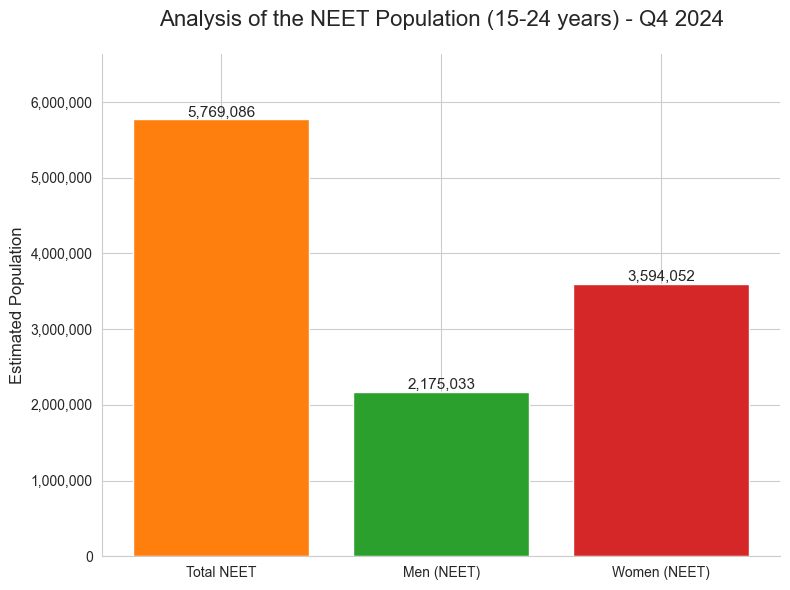

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Generating the focused NEET chart...")

# 1. Prepare the data for the plot (WITHOUT 'Total Youth')
labels = ['Total NEET', 'Men (NEET)', 'Women (NEET)']
values = [total_neet, male_neet, female_neet] # Removemos a variável total_youth
colors = ['#ff7f0e', '#2ca02c', '#d62728'] # Laranja, Verde, Vermelho

# 2. Set up the plot style and create the figure
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6)) # Ajustamos o tamanho para 3 barras

# 3. Create the bar chart
bars = ax.bar(labels, values, color=colors)

# 4. Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}',
            ha='center', va='bottom', fontsize=11)

# 5. Customize the chart
ax.set_title('Analysis of the NEET Population (15-24 years) - Q4 2024', fontsize=16, pad=20)
ax.set_ylabel('Estimated Population', fontsize=12)
ax.set_ylim(0, max(values) * 1.15) # O limite do eixo Y agora se ajusta aos valores NEET

# Format the Y-axis numbers
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))
)
sns.despine()

# 6. Display the final chart
plt.tight_layout()
plt.show()

### 6. State Level Comparison

Now, let's group the NEET population by state (`UF_name`) to see the distribution across the country. We will display a data table and then create a horizontal bar chart for better visualization.

Starting state-level analysis...

--- NEET Population by State (Top 10) ---


,NEET Population
UF_name,
São Paulo,"918,470"
Bahia,"486,549"
Minas Gerais,"458,919"
Rio de Janeiro,"441,531"
Pernambuco,"369,626"
Maranhão,"351,715"
Ceará,"342,231"
Pará,"329,467"
Paraná,"210,725"



Generating state-level bar chart...


C:\Users\ligia\AppData\Local\Temp\ipykernel_19764\2473857888.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


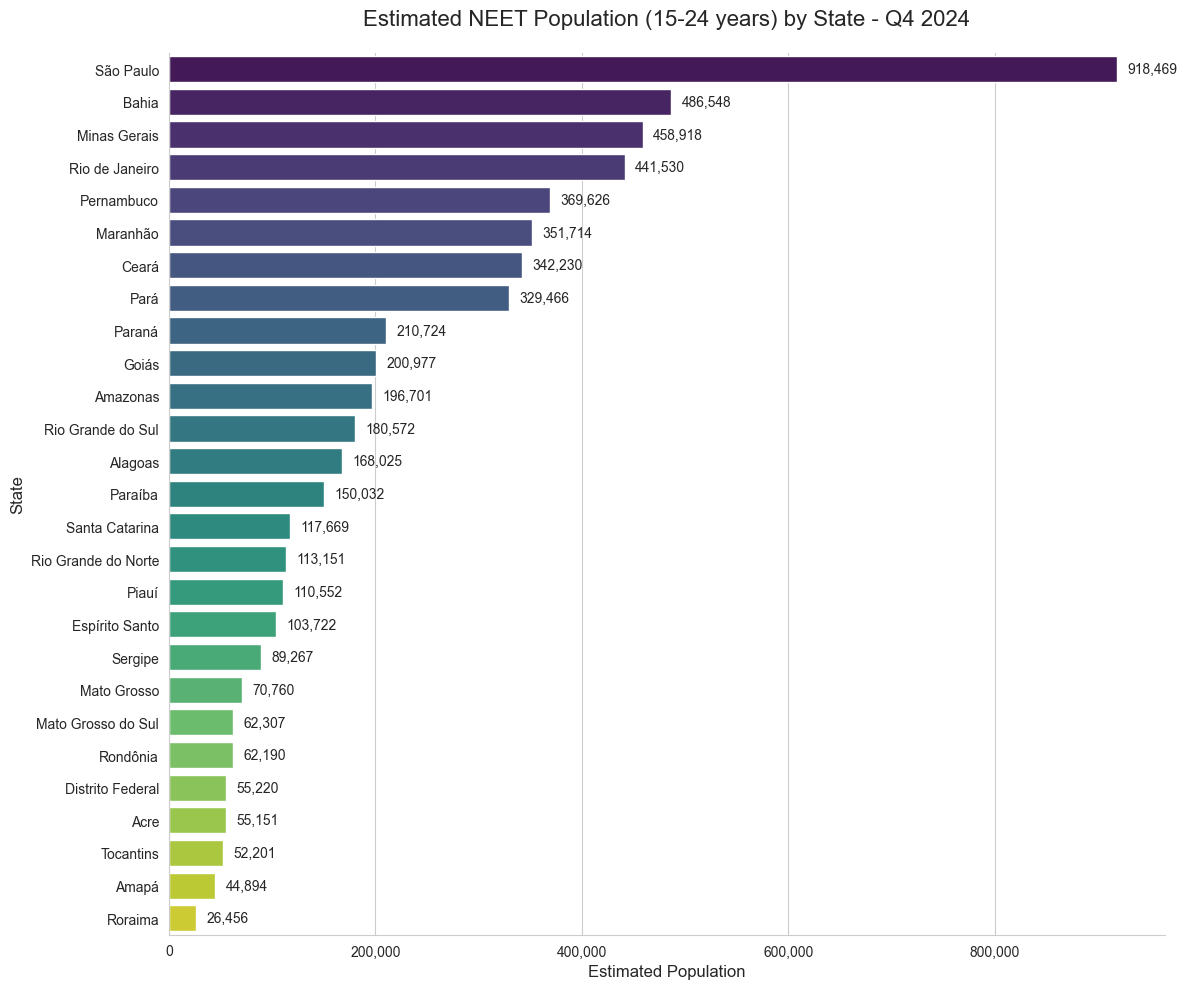

In [33]:
print("Starting state-level analysis...")

# 1. Create a dictionary to map state codes (id_uf) to state names
uf_mapping = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá',
    17: 'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte',
    25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia',
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo',
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# 2. Group the NEET dataframe by state and sum the weights
neet_by_uf = df_neet.groupby('id_uf')['weight'].sum().reset_index()

# 3. Map the codes to names and rename columns
neet_by_uf['UF_name'] = neet_by_uf['id_uf'].map(uf_mapping)
neet_by_uf.rename(columns={'weight': 'NEET_population'}, inplace=True)

# 4. Sort the data
neet_by_uf_sorted = neet_by_uf.sort_values('NEET_population', ascending=False)

# 5. Display the data table (using your suggested method, without .style)
print("\n--- NEET Population by State (Top 10) ---")
formatted_table = neet_by_uf_sorted.head(10).set_index('UF_name')
display(formatted_table['NEET_population'].apply('{:,.0f}'.format).to_frame(name='NEET Population'))


# 6. Create the horizontal bar chart
print("\nGenerating state-level bar chart...")
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='NEET_population',
    y='UF_name',
    data=neet_by_uf_sorted,
    palette='viridis'
)

ax.set_title('Estimated NEET Population (15-24 years) by State - Q4 2024', fontsize=16, pad=20)
ax.set_xlabel('Estimated Population', fontsize=12)
ax.set_ylabel('State', fontsize=12)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 10000, p.get_y() + p.get_height() / 2., f'{int(width):,}',
            ha='left', va='center')

sns.despine()
plt.tight_layout()
plt.show()

### 7. State Level Comparison by Percentage

The absolute number of NEETs can be misleading since states like São Paulo have a much larger population. A more insightful analysis is to calculate the **percentage of young people who are NEETs** within each state. This normalizes the data and reveals the states with the highest NEET *rate*.

Calculating NEET rate per state...

--- NEET Rate by State ---


,NEET_population,total_youth_population,NEET_rate_pct
UF_name,,,
Acre,"55,151","172,087",32.0%
Alagoas,"168,026","567,633",29.6%
Maranhão,"351,715","1,210,016",29.1%
Amapá,"44,895","158,162",28.4%
Pernambuco,"369,626","1,425,732",25.9%
Ceará,"342,231","1,324,243",25.8%
Amazonas,"196,702","774,432",25.4%
Paraíba,"150,033","605,018",24.8%
Roraima,"26,456","109,330",24.2%



Generating NEET rate bar chart...


C:\Users\ligia\AppData\Local\Temp\ipykernel_19764\1247298526.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


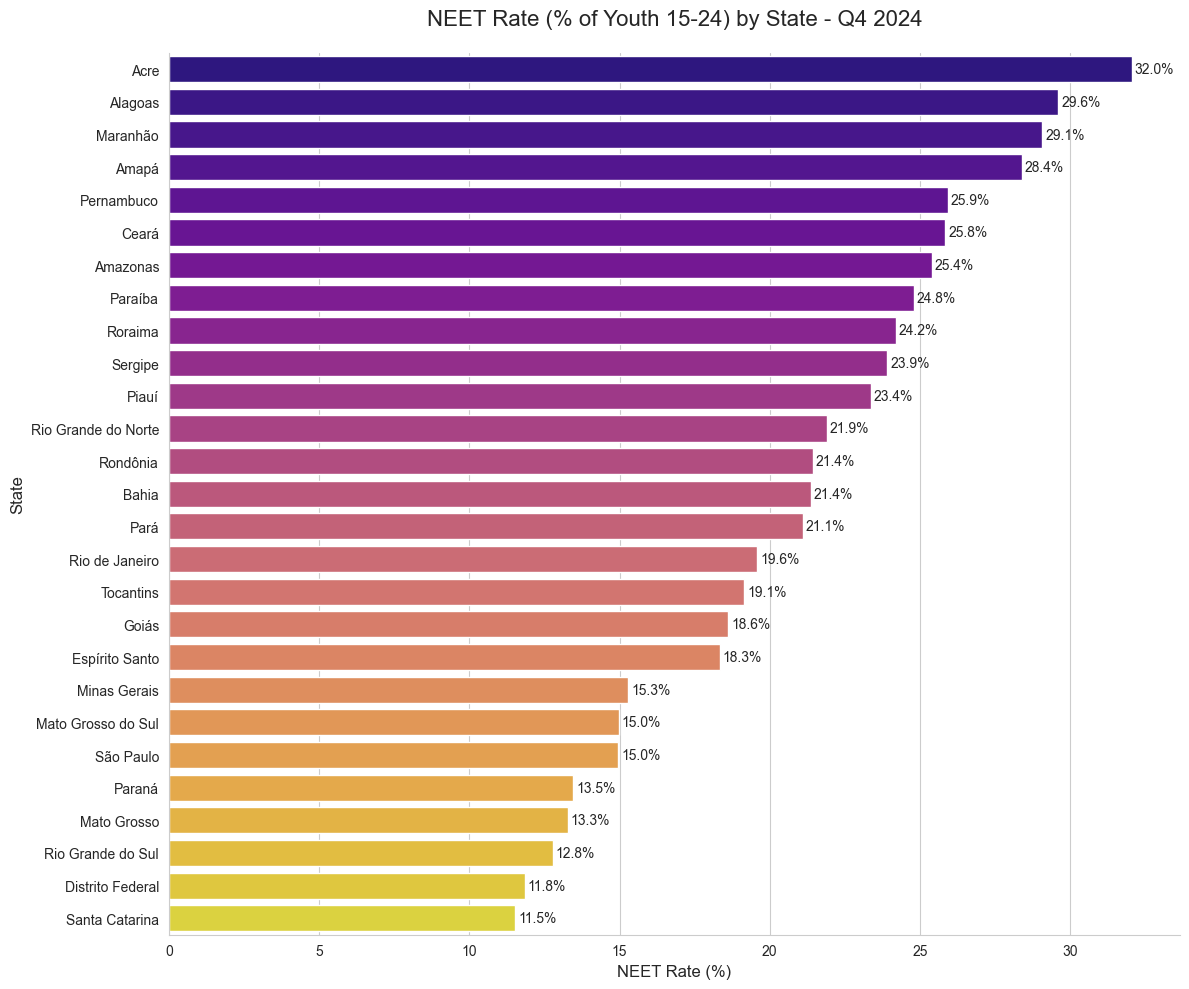

In [34]:
print("Calculating NEET rate per state...")

# 1. Calculate the total youth population for each state
# We use 'data_scope', which contains all youth (15-24) from Q4 2024
total_youth_by_uf = data_scope.groupby('id_uf')['weight'].sum().reset_index()
total_youth_by_uf.rename(columns={'weight': 'total_youth_population'}, inplace=True)

# 2. Merge the total youth data with the NEET population data
# 'neet_by_uf' was calculated in the previous step
state_comparison = pd.merge(total_youth_by_uf, neet_by_uf, on='id_uf')

# 3. Calculate the NEET rate (percentage)
state_comparison['NEET_rate_pct'] = \
    (state_comparison['NEET_population'] / state_comparison['total_youth_population']) * 100

# 4. Sort by the highest NEET rate
state_comparison_sorted = state_comparison.sort_values('NEET_rate_pct', ascending=False)


# 5. Display the data table
print("\n--- NEET Rate by State ---")
# Format the columns for better readability
display_table = state_comparison_sorted[['UF_name', 'NEET_population', 'total_youth_population', 'NEET_rate_pct']].set_index('UF_name')
display_table['NEET_population'] = display_table['NEET_population'].apply('{:,.0f}'.format)
display_table['total_youth_population'] = display_table['total_youth_population'].apply('{:,.0f}'.format)
display_table['NEET_rate_pct'] = display_table['NEET_rate_pct'].apply('{:.1f}%'.format)

display(display_table)


# 6. Create the horizontal bar chart for NEET Rate
print("\nGenerating NEET rate bar chart...")
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='NEET_rate_pct',
    y='UF_name',
    data=state_comparison_sorted,
    palette='plasma' # Using a different color palette
)

ax.set_title('NEET Rate (% of Youth 15-24) by State - Q4 2024', fontsize=16, pad=20)
ax.set_xlabel('NEET Rate (%)', fontsize=12)
ax.set_ylabel('State', fontsize=12)

# Add data labels (percentages) to the end of the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, # Position text slightly after the bar
            p.get_y() + p.get_height() / 2.,
            f'{width:.1f}%', # Format as percentage with one decimal place
            ha='left',
            va='center')

sns.despine()
plt.tight_layout()
plt.show()

### 8. Deep Dive: Gender and Race Analysis in North & Northeast Regions

Given that the highest NEET rates are concentrated in the North and Northeast, let's investigate the demographic profile of NEETs in these specific regions. This cross-analysis of gender and race will help us understand *who* is most affected where the problem is most severe.

Starting deep dive analysis into North & Northeast regions...

--- Demographic Breakdown of NEET Population in North & Northeast ---


Gender                    Female     Male
Region    Race                           
North     Asian            4,086      620
          Black           39,950   22,971
          Indigenous       9,083    3,037
          Pardo (Brown)  382,494  174,233
          White           80,836   49,753
Northeast Asian            3,138    2,710
          Black          182,241  116,975
          Indigenous       7,617    2,663
          Not Declared         0    1,152
          Pardo (Brown)  862,765  516,933
          White          297,650  187,306


Generating demographic chart...


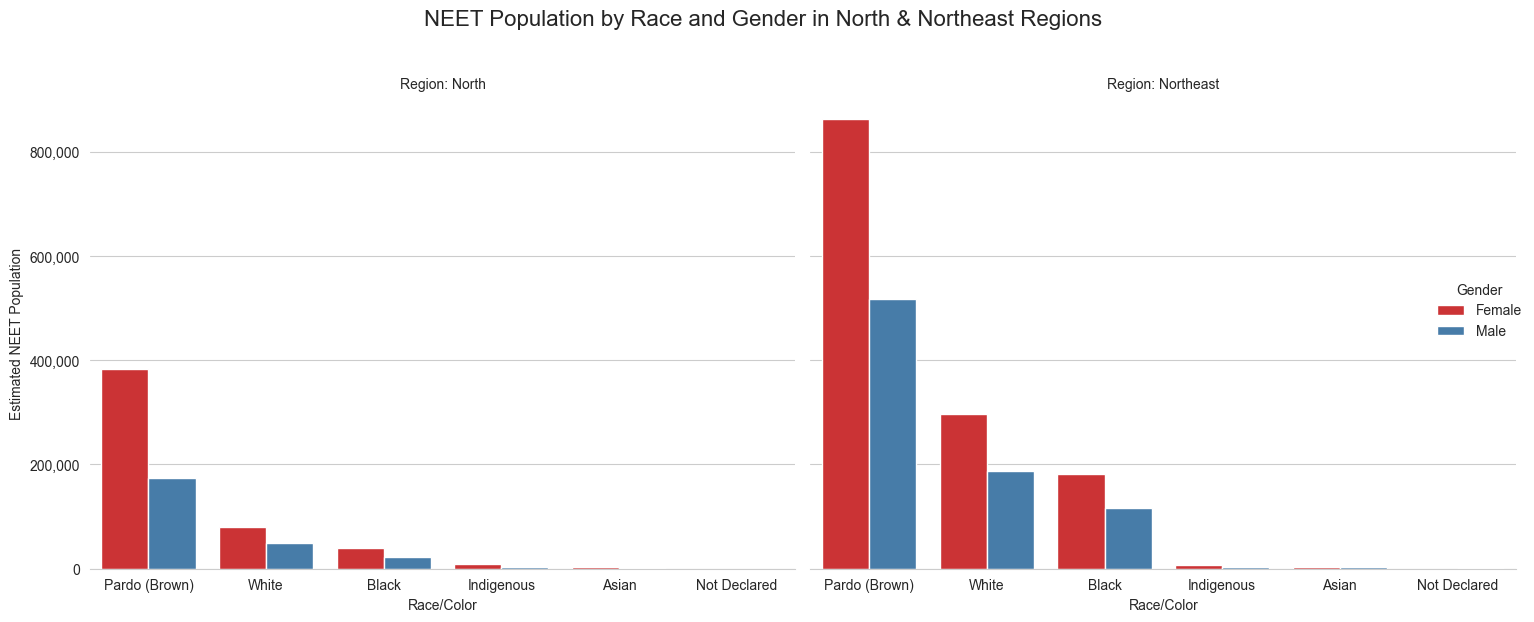

In [36]:
print("Starting deep dive analysis into North & Northeast regions...")

# 1. Define the regions by their state codes (id_uf)
north_region_codes = [11, 12, 13, 14, 15, 16, 17] # RO, AC, AM, RR, PA, AP, TO
northeast_region_codes = [21, 22, 23, 24, 25, 26, 27, 28, 29] # MA, PI, CE, RN, PB, PE, AL, SE, BA

def get_region(uf_code):
    if uf_code in north_region_codes:
        return 'North'
    if uf_code in northeast_region_codes:
        return 'Northeast'
    return 'Other'

# 2. Create a filtered dataframe for only North and Northeast NEETs
df_regions = df_neet[df_neet['id_uf'].isin(north_region_codes + northeast_region_codes)].copy()

# 3. Add descriptive columns for Region, Race, and Gender
df_regions['Region'] = df_regions['id_uf'].apply(get_region)
race_mapping = {1: 'White', 2: 'Black', 3: 'Asian', 4: 'Pardo (Brown)', 5: 'Indigenous', 9: 'Not Declared'}
df_regions['Race'] = df_regions['race_code'].map(race_mapping)
gender_mapping = {0: 'Male', 1: 'Female'}
df_regions['Gender'] = df_regions['female'].map(gender_mapping)

# 4. Group by Region, Gender, and Race to get the population estimates
neet_demographics = df_regions.groupby(['Region', 'Gender', 'Race'])['weight'].sum().reset_index()
neet_demographics.rename(columns={'weight': 'NEET_population'}, inplace=True)

# 5. Display the data table (pivot for better readability)
print("\n--- Demographic Breakdown of NEET Population in North & Northeast ---")
demographics_pivot = neet_demographics.pivot_table(
    index=['Region', 'Race'],
    columns='Gender',
    values='NEET_population',
    fill_value=0
)
# Use .applymap() to format all cells in the pivot table without .style
display(demographics_pivot.apply(lambda x: x.map('{:,.0f}'.format)))


# 6. Create a faceted bar chart for visualization
print("\nGenerating demographic chart...")

g = sns.catplot(
    data=neet_demographics,
    x='Race',
    y='NEET_population',
    hue='Gender',
    col='Region',
    kind='bar',
    height=6,
    aspect=1.2,
    palette={'Male': '#377eb8', 'Female': '#e41a1c'},
    order=['Pardo (Brown)', 'White', 'Black', 'Indigenous', 'Asian', 'Not Declared']
)

g.fig.suptitle('NEET Population by Race and Gender in North & Northeast Regions', y=1.03, fontsize=16)
g.set_axis_labels("Race/Color", "Estimated NEET Population")
g.set_titles("Region: {col_name}")
g.despine(left=True)

for ax in g.axes.flat:
    ax.get_yaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ','))
    )

plt.tight_layout()
plt.show()